# Project Title: House price data analysis

## 1. Introduction (Notebook 1)
###  Project Overview
This notebook focuses on conducting a comprehensive exploratory data analysis (EDA) of the Melbourne Housing Snapshot dataset. The primary goal is to uncover hidden patterns, identify key features, and gain a deep understanding of the factors that influence property prices in Melbourne. This analysis will establish the foundation for subsequent machine learning model development in the second phase of the project.
### Dataset Description.
The dataset utilized in this analysis, the Melbourne Housing Snapshot, provides detailed information on residential properties sold in Melbourne, Australia. Features include square footage, number of bedrooms and bathrooms, year built, lot size, address, property type, and other pertinent characteristics. The target variable is the sale price of each house. This [dataset](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot), obtained from [Kaggle](https://www.kaggle.com/), offers a valuable resource for examining the impact of diverse property attributes on market value. It encompasses both numerical and categorical data types, enabling a comprehensive analysis.
#### Objective:
The goals of this notebook are:
+ To perform thorough data cleaning, addressing missing values and identifying potential outliers to ensure data quality and reliability for subsequent analysis and modeling.
+ To conduct exploratory data analysis (EDA) to uncover meaningful insights into the relationships between house features and their sale prices, identifying key drivers of property value.
+ To identify and engineer relevant features that significantly influence house prices, providing a solid foundation for building effective machine learning models in the next phase.
+ To prepare the dataset by cleaning, encoding, and formatting it appropriately for input into various regression algorithms in the subsequent notebook.

## 2. Setup and Data Loading


In [390]:
#Import Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [474]:
# Load Dataset:
path = 'dataset/melb_data.csv'
data = pd.read_csv(path)

# Display first five rows of the dataset:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## 3. Data Exploration and Cleaning

In [475]:
# Data Summary:
data.info()
print('=========summary statistics===========')
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [476]:
range = data['Price'].max() - data['Price'].min()
print('Range:', range)

Range: 8915000.0


### Explanations:
* The 'data.info' reviews the following:
  + The data contains 13580 data entries(row) and 21 columns(features).
  + There is a mix of data types: integers (int64), floats (float64), and objects (objects).
  + The 'objects' data types likely represent categorical features, which will require encoding for machine learning models.
  + There following features 'BuildingArea', 'YearBuilt', 'CouncilArea' have missing values since their total number of non-null values are less than the total number of rows.
* The 'data.describe()' output provides summary statistics for the numerical columns:
  + The 'SalePrice' (target variable) has a wide range, indicating variability in house prices.
  + The 'LandSize' has a maximum value significantly higher than the 75th percentile, suggestiong potential outliers.
  + Some features like 'Distance', 'bedroom', 'bathroom' etc have minimum value of 0 which could indicate missing data or the absence of a feature.
  + Some the standard deviation of some features like 'LandSize', 'BuildingArea', 'Propatycount' have very high standard deviation indcating that a wide spread of the data around the mean.

### Handle Missing Values

In [477]:
data.isnull().sum() # sum of missing values per column

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [478]:
data.isnull().mean() # average missing values per columns

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004566
Landsize         0.000000
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

### Visualized missing values patterns

<Axes: >

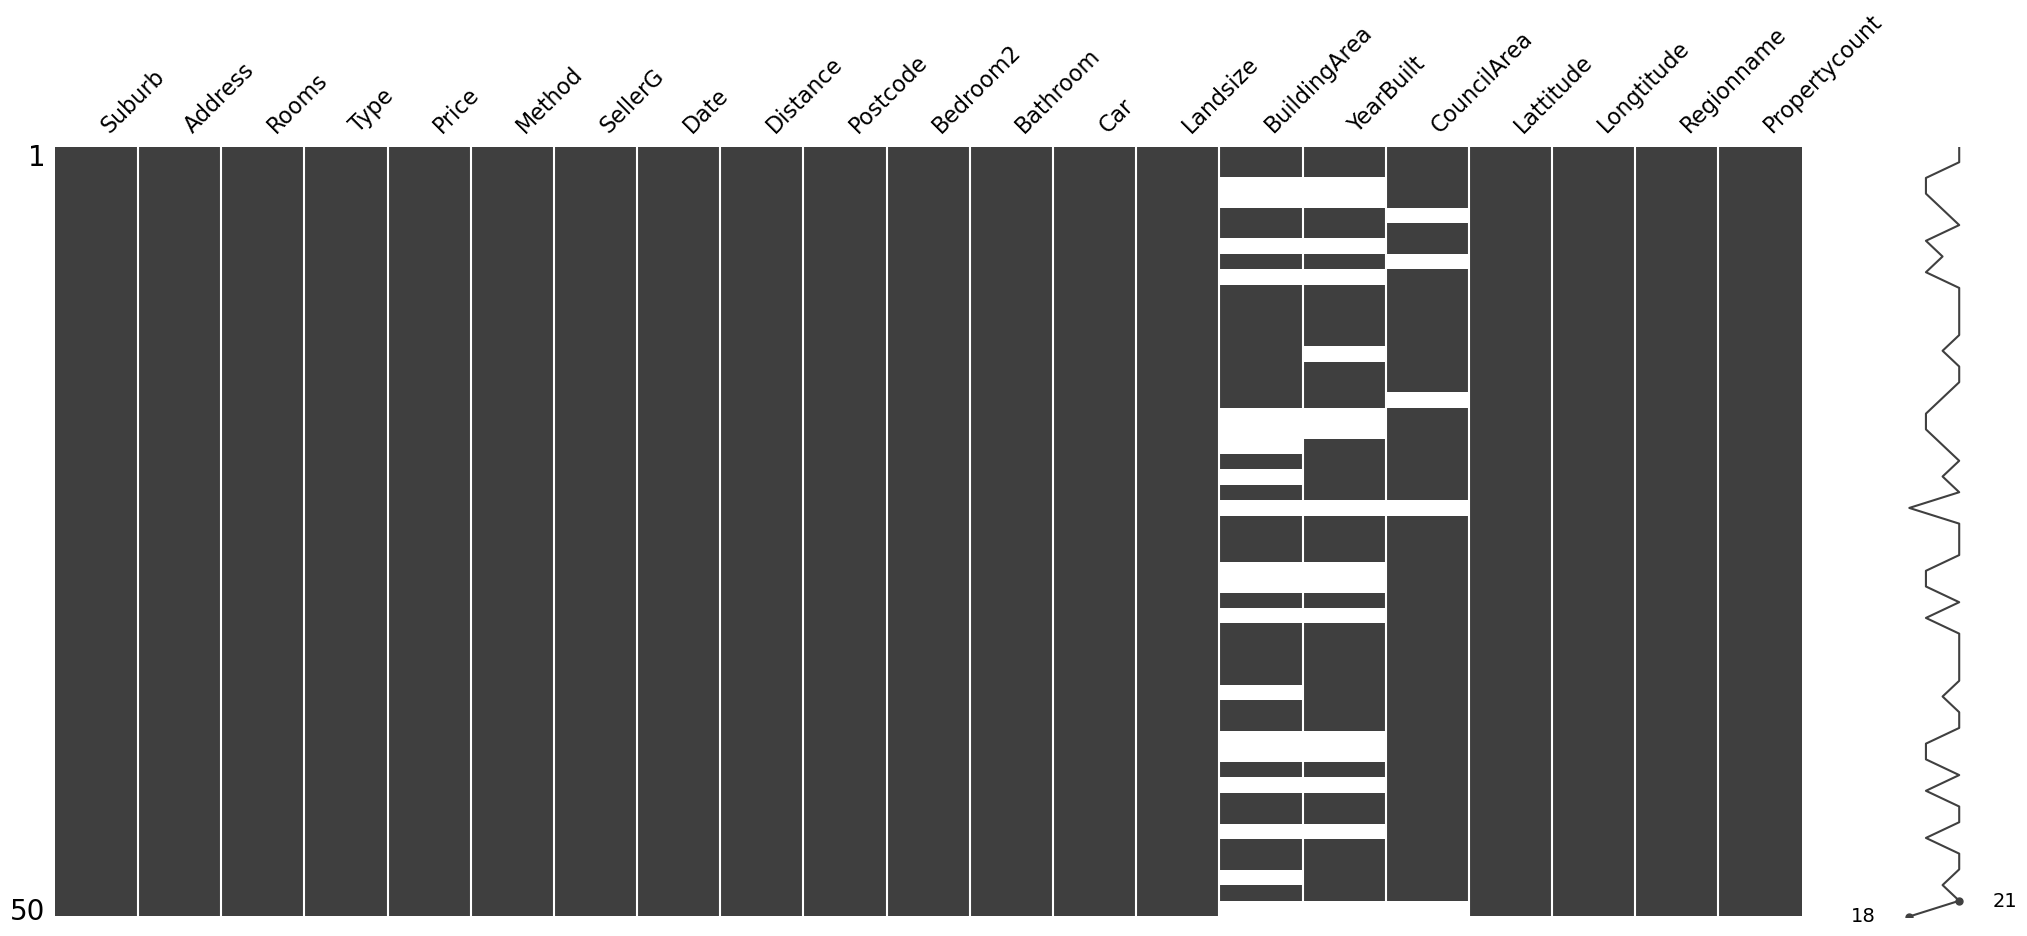

In [479]:
msno.matrix(data.sample(50))

The plot above indicates the following:
+ presence of missing values in the columns 'Car', 'BuildArea', 'YearBuilt'and 'CouncilArea' with 'Car' has less missing values compared to the other. 
+ pattern in the missing values for the 'BuildingArea' and 'YearBuild' columns.

<Axes: >

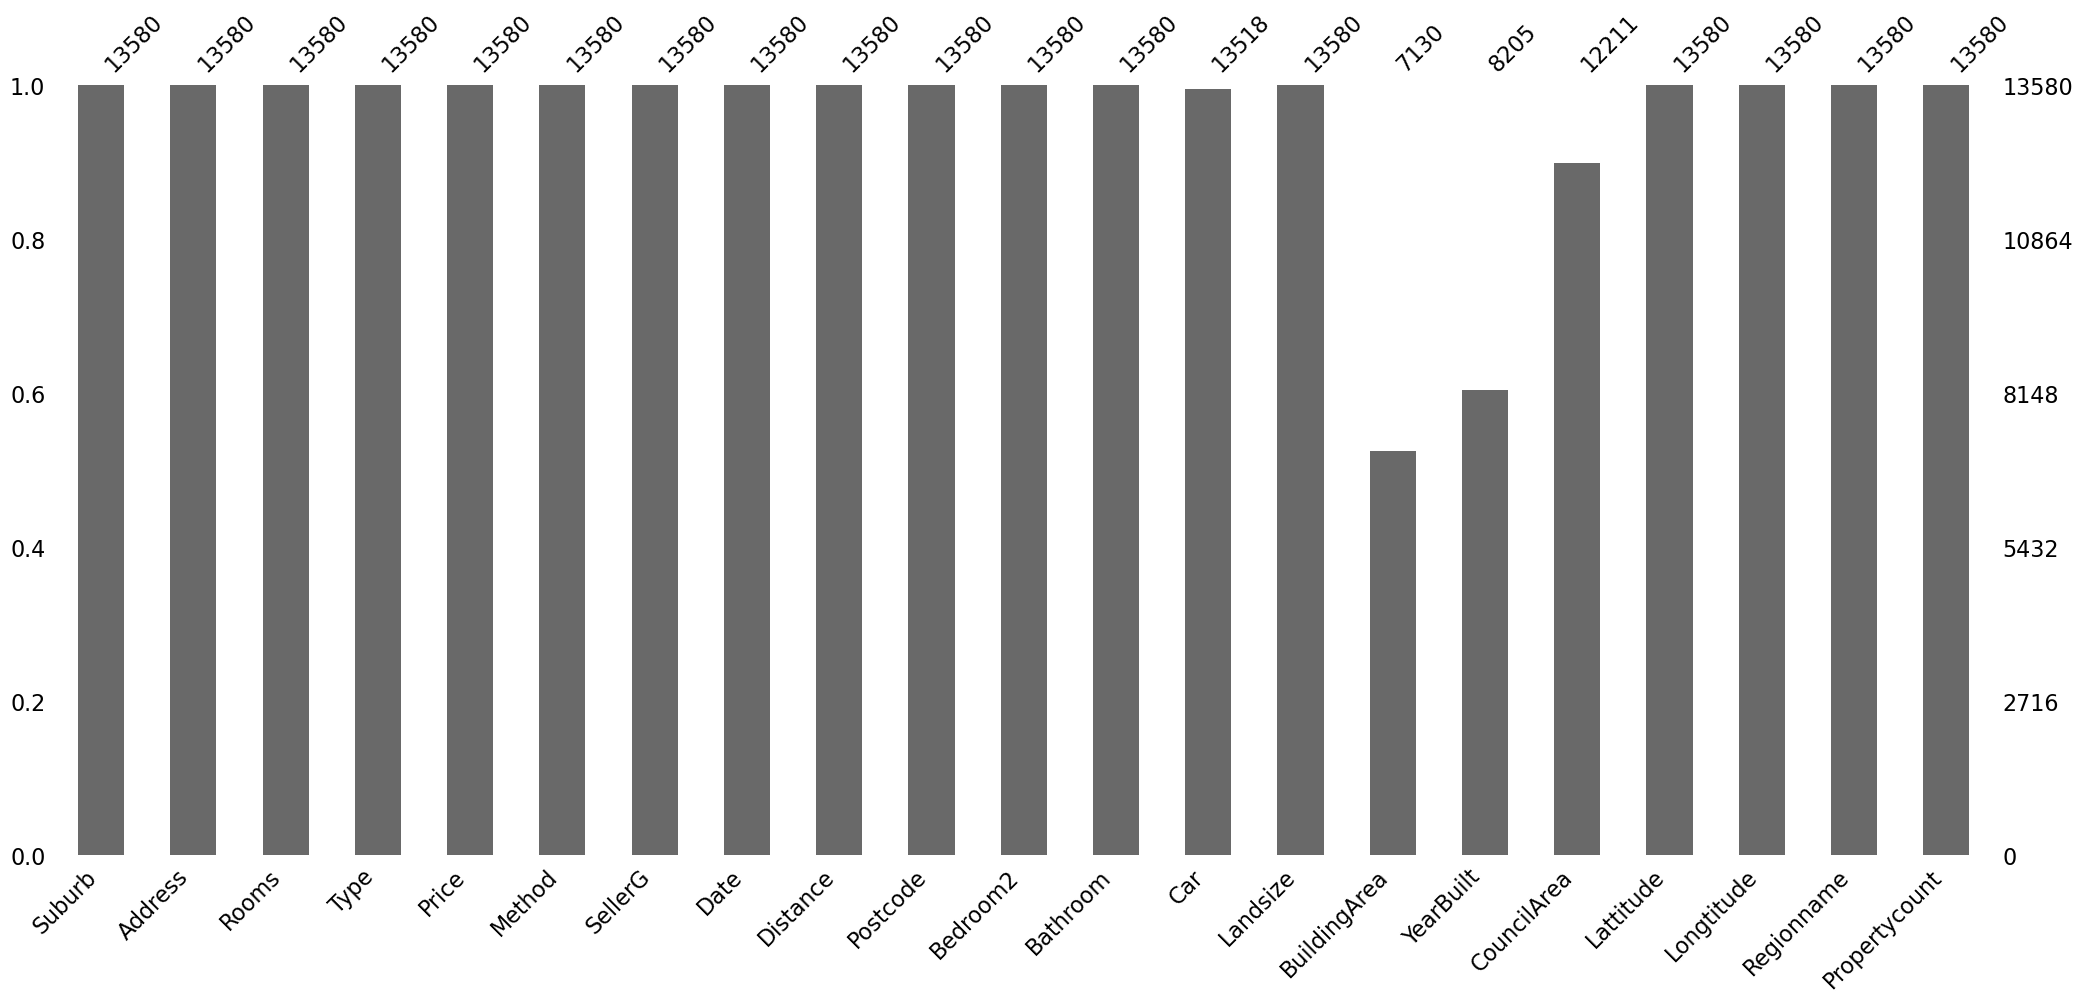

In [480]:
msno.bar(data)

The plot above gives the following informations:
+ The full black vertical strips indicate the absence of missing values.
+ The half bars indicate the presence of missing values.

<Axes: >

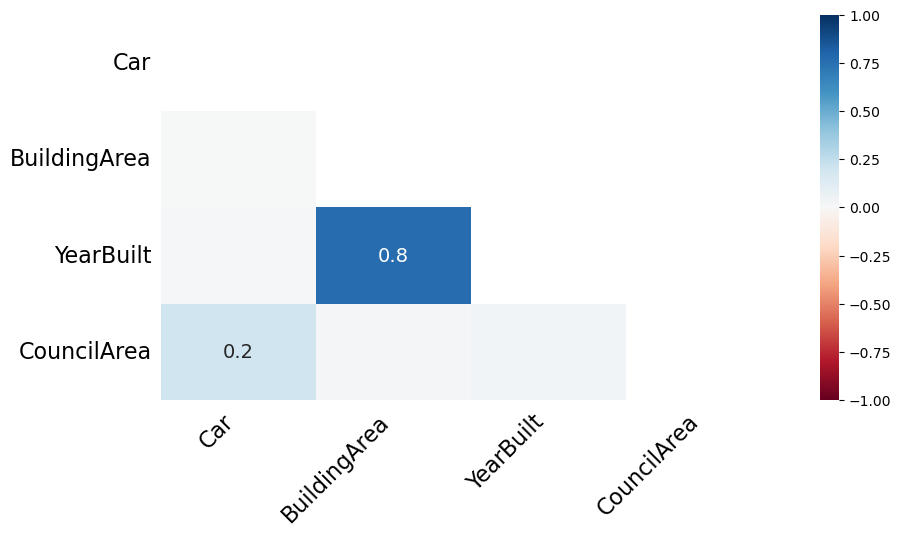

In [481]:
msno.heatmap(data, figsize=(10, 5))

The graph above shows how strong the presence or absence of one feature affects the other.
The graph shows a correlation value of 0.8 between 'BuildingArea' and 'YearBuild' which indicates that the presence of a missing value in one feature would likely result to a missing value in the other feature. This is a confirmation of the pattern indicated above in the matrix plot with the vertical white strips from 'BuildArea' to 'YearBuilt'.

In [482]:
data[['BuildingArea', 'YearBuilt']].dtypes

BuildingArea    float64
YearBuilt       float64
dtype: object

<Axes: >

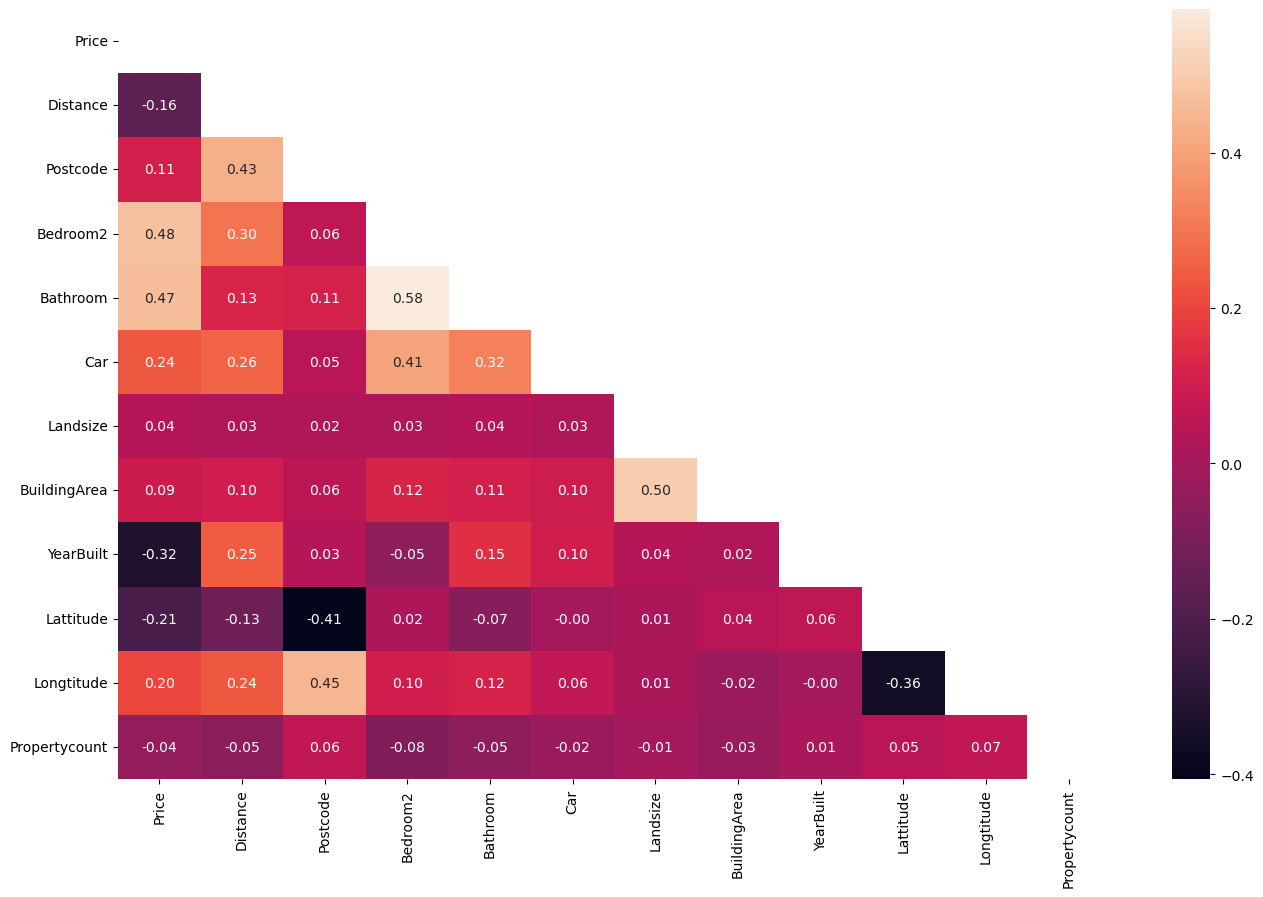

In [483]:
num_data = data.select_dtypes(include=float)
mask = np.triu(np.ones_like(num_data.corr(), dtype=bool))
plt.figure(figsize=(16, 10))
sns.heatmap(num_data.corr(), annot=True, fmt='.2f', mask=mask)

We would create indicator values for the missing values to explicitly inform models about which models were missing, then fill the original missing values with their midian values. As a stragy for dealing with missing values. For detail explanations, please see this article. This approach is prefered in the case of this dataset for two reason.
+ There are serveral missing values, dropping them would reduce amost 50 % of the dataset
+ Since the data types are all numeric, we could consider replacing the missing values with the mean or median directly. However, this might introduce bias in the dataset.

In [484]:
data['BuildingAreaMissing'] = data['BuildingArea'].fillna(0).astype(bool).astype(int)
data['YearBuiltMissing'] = data['YearBuilt'].fillna(0).astype(bool).astype(int)
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median())
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())

### Identify and handle missing values.

In [489]:
num_data.columns

Index(['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')